In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', sep=";")

In [3]:
print(df.shape)
df.head()
df.info()
df.describe()

(6559, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   6559 non-null   object 
 1   Geo Shape   6559 non-null   object 
 2   OBJECTID    6559 non-null   int64  
 3   IPEDSID     6559 non-null   int64  
 4   NAME        6559 non-null   object 
 5   ADDRESS     6558 non-null   object 
 6   CITY        6559 non-null   object 
 7   STATE       6559 non-null   object 
 8   ZIP         6559 non-null   int64  
 9   ZIP4        6559 non-null   object 
 10  TELEPHONE   6559 non-null   object 
 11  TYPE        6559 non-null   int64  
 12  STATUS      6559 non-null   object 
 13  POPULATION  6559 non-null   int64  
 14  COUNTY      6559 non-null   object 
 15  COUNTYFIPS  6559 non-null   object 
 16  COUNTRY     6559 non-null   object 
 17  LATITUDE    6559 non-null   float64
 18  LONGITUDE   6559 non-null   float64
 19  NAICS_CODE  6559

,OBJECTID,IPEDSID,ZIP,TYPE,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,SECTOR,LEVEL_,...,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP
count,6559.00000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,...,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000,6559.000000
mean,3280.00000,290230.601006,49006.583473,2.010215,3495.304010,37.209344,-90.511778,611363.538802,5.763226,1.810794,...,19.792194,6587.570209,8.614880,1.526452,854.410276,1774.002134,2944.302943,1.532551,-188.192255,485.355542
std,1893.56454,140513.800011,30226.485810,1.007771,8769.568327,5.949359,18.113995,127.592843,11.028694,0.903232,...,9.614955,50252.079755,11.019717,1.238744,3634.161191,5195.132694,7471.088126,0.762894,1718.356611,1727.646896
min,1.00000,100654.000000,602.000000,-3.000000,-999.000000,-14.323171,-170.743175,611210.000000,0.000000,-3.000000,...,-3.000000,-2.000000,-2.000000,-2.000000,-999.000000,-999.000000,-999.000000,-2.000000,-999.000000,-999.000000
25%,1640.50000,171349.500000,23032.500000,1.000000,113.000000,33.884990,-97.688684,611310.000000,2.000000,1.000000,...,12.000000,-2.000000,-2.000000,1.000000,-999.000000,62.000000,88.000000,1.000000,-999.000000,17.000000
50%,3280.00000,223852.000000,46202.000000,2.000000,518.000000,38.627026,-86.391529,611310.000000,4.000000,2.000000,...,21.000000,-2.000000,5.000000,1.000000,57.000000,291.000000,412.000000,2.000000,-999.000000,72.000000
75%,4919.50000,449078.500000,77024.500000,3.000000,2921.000000,41.230782,-78.784893,611511.000000,8.000000,3.000000,...,22.000000,-2.000000,19.000000,2.000000,802.000000,1448.500000,2423.000000,2.000000,237.000000,434.000000
max,6559.00000,496423.000000,99801.000000,3.000000,154991.000000,71.324702,171.378442,611710.000000,99.000000,3.000000,...,43.000000,495767.000000,33.000000,5.000000,93333.000000,147866.000000,147866.000000,2.000000,20580.000000,35030.000000


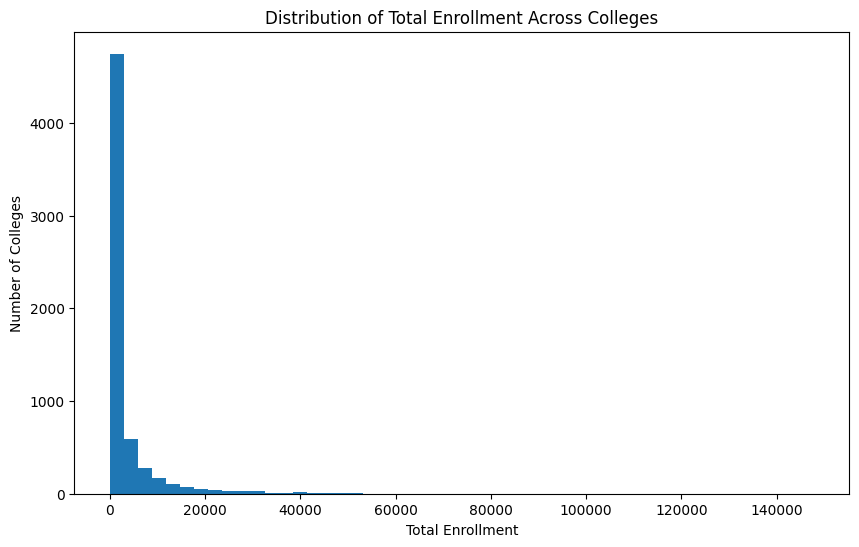

In [4]:
enrollment = pd.to_numeric(df["TOT_ENROLL"], errors="coerce")
enrollment = enrollment[enrollment > 0].dropna()
plt.figure(figsize=(10,6))
plt.hist(enrollment, bins=50)
plt.title("Distribution of Total Enrollment Across Colleges")   
plt.xlabel("Total Enrollment")
plt.ylabel("Number of Colleges")
plt.grid(False)
plt.show()

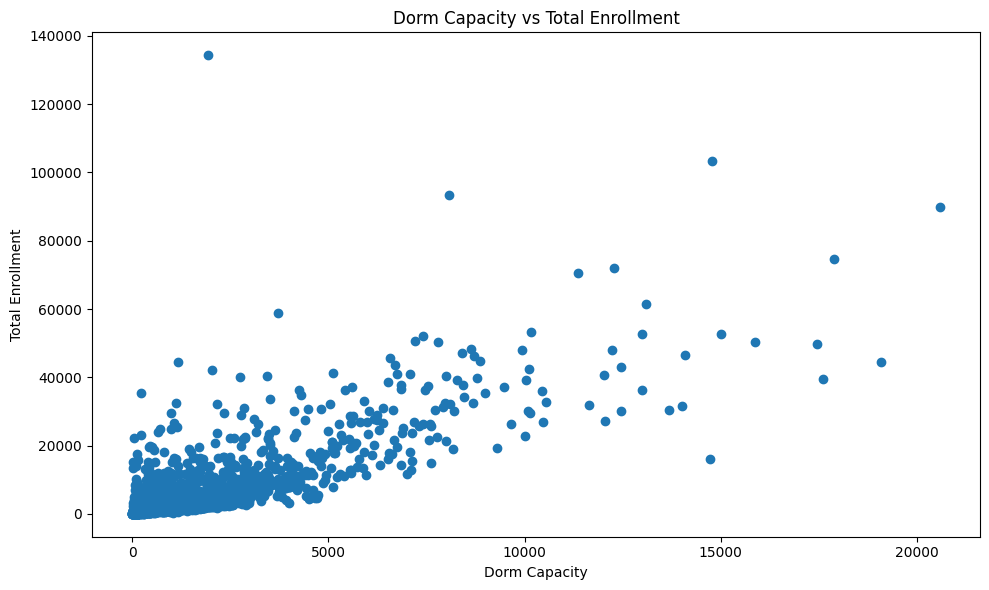

In [5]:
df = df[(df["TOT_ENROLL"] >= 0) & (df["DORM_CAP"] >= 0)]

df = df.dropna(subset=["TOT_ENROLL", "DORM_CAP"])

plt.figure(figsize=(10,6))
plt.scatter(df["DORM_CAP"], df["TOT_ENROLL"])

plt.xlabel("Dorm Capacity")
plt.ylabel("Total Enrollment")
plt.title("Dorm Capacity vs Total Enrollment")
plt.tight_layout()
plt.show()

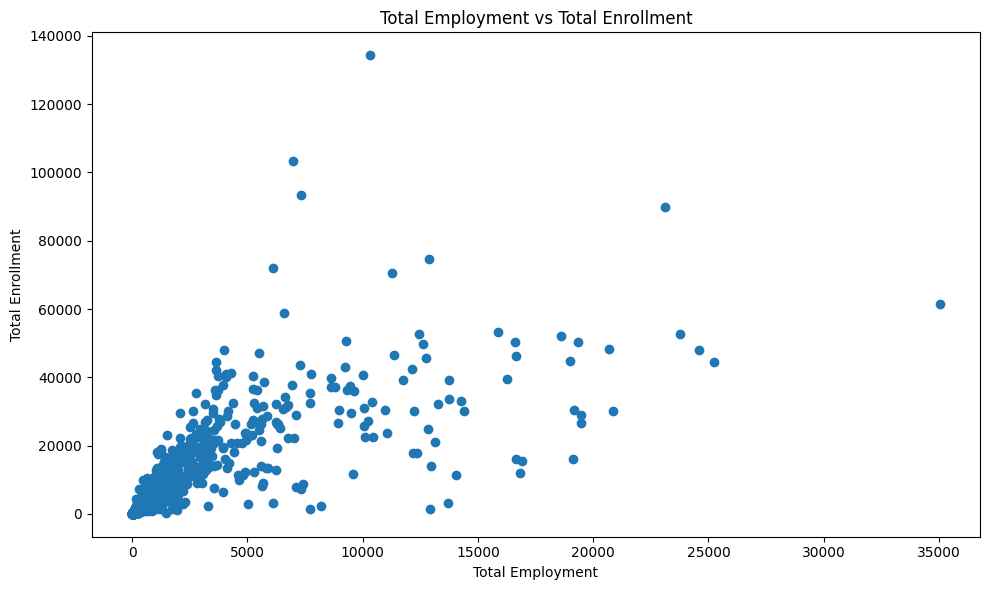

In [6]:
df = df[(df["TOT_ENROLL"] >= 0) & (df["TOT_EMP"] >= 0)]

df = df.dropna(subset=["TOT_ENROLL", "TOT_EMP"])

plt.figure(figsize=(10,6))
plt.scatter(df["TOT_EMP"], df["TOT_ENROLL"])

plt.xlabel("Total Employment")
plt.ylabel("Total Enrollment")
plt.title("Total Employment vs Total Enrollment")
plt.tight_layout()
plt.show()

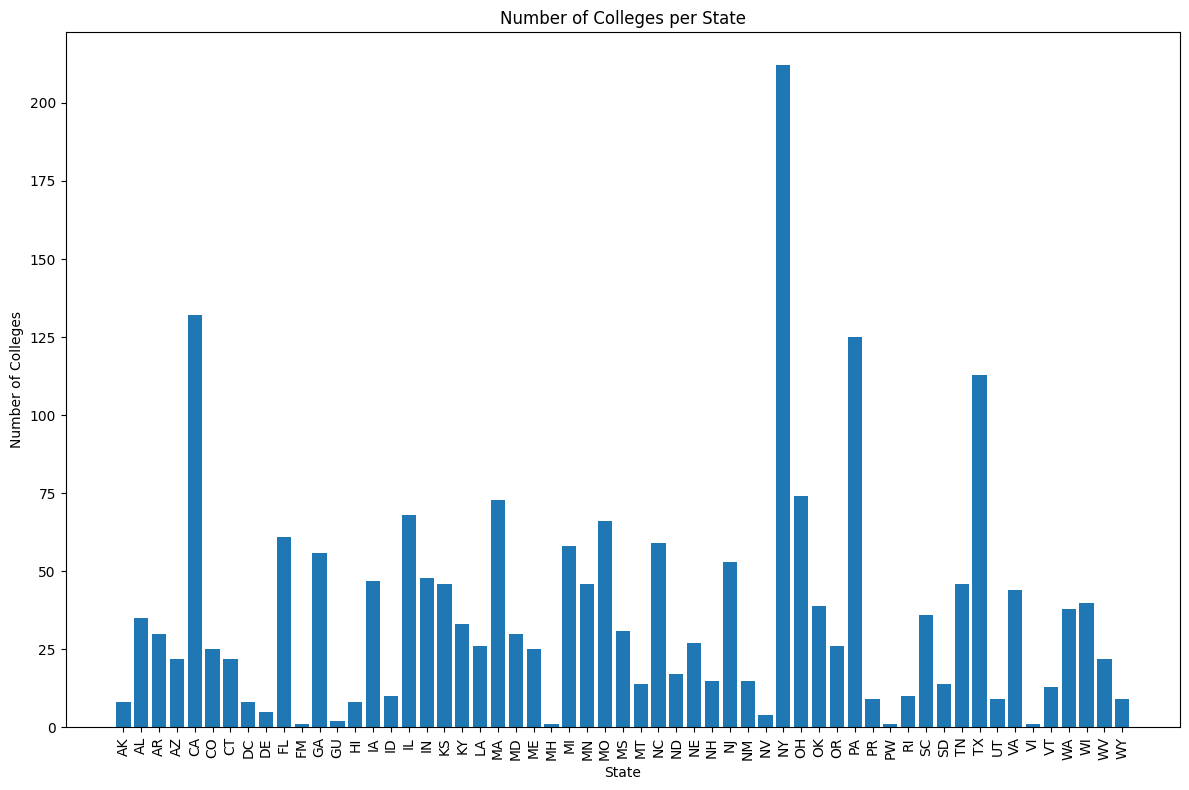

In [7]:
counts = df["STATE"].value_counts().sort_index()

plt.figure(figsize=(12,8))
plt.bar(counts.index, counts.values)

plt.xlabel("State")
plt.ylabel("Number of Colleges")
plt.title("Number of Colleges per State")
plt.xticks(rotation=90)    # turn labels so they fit
plt.tight_layout()
plt.show()

In [12]:
print("=== College Matching System ===")

num = int(input("How many different states are you considering?").strip())
for i in range(num):
    print(f"State {i+1}: ", end="")
    state = input("Preferred state (e.g., CA, NY, MO or leave blank for no preference): ").upper().strip()

publicPrivate = input("Prefer public or private college (public/private): ").lower().strip()

enroll_range = input("Preferred enrollment range (small/medium/large): ").strip()

needs_dorms = input("Do you want on-campus housing? (yes/no): ").lower().strip()

level_of_education = input("Preferred level of education (2-year/4-year): ").strip()

ratio_preference = input("Preferred student-faculty ratio (low/medium/high or skip): ").lower().strip()

print("State:", state)
print("Public or Private:", publicPrivate)
print("Size of school:", enroll_range)
print("Needs dorms:", needs_dorms)
print("Level of Education:", level_of_education)

=== College Matching System ===
State 1: State 2: State 3: State: CA
Public or Private: public
Size of school: medium
Needs dorms: yes
Level of Education: 4-year


In [13]:
print("=== How important are these preferences to you? (1-3, with 3 being most important) ===")

state_importance = int(input("State importance(1-3): "))
publicPrivate_importance = int(input("Public/Private importance(1-3): "))
enroll_range_importance = int(input("Enrollment range importance(1-3): "))
needs_dorms_importance = int(input("On-campus housing importance(1-3): "))
level_of_education_importance = int(input("Level of education importance(1-3): "))
ratio_importance = int(input("Student-faculty ratio importance (1–3): "))

print("State importance:", state_importance)
print("Public/Private importance:", publicPrivate_importance)
print("Enrollment range importance:", enroll_range_importance)
print("On-campus housing importance:", needs_dorms_importance)
print("Level of education importance:", level_of_education_importance)

=== How important are these preferences to you? (1-3, with 3 being most important) ===
State importance: 1
Public/Private importance: 3
Enrollment range importance: 2
On-campus housing importance: 3
Level of education importance: 2


In [14]:
df["TOT_ENROLL"] = pd.to_numeric(df["TOT_ENROLL"], errors="coerce").fillna(0)
df["HOUSING"] = pd.to_numeric(df["HOUSING"], errors="coerce").fillna(0)

df["TOT_EMP"] = pd.to_numeric(df["TOT_EMP"], errors="coerce")
df["student_faculty_ratio"] = df["TOT_ENROLL"] / df["TOT_EMP"]

def score_college(row):
    score = 0

    if state and row["STATE"] == state:
        score += state_importance

    if enroll_range == "small" and row["TOT_ENROLL"] < 5000:
        score += enroll_range_importance
    elif enroll_range == "medium" and 5000 <= row["TOT_ENROLL"] <= 15000:
        score += enroll_range_importance
    elif enroll_range == "large" and row["TOT_ENROLL"] > 15000:
        score += enroll_range_importance
        
    if publicPrivate == "public" and row["TYPE"] == 1:
        df["TYPE"] = "PUBLIC"
        score += publicPrivate_importance
    elif publicPrivate == "private" and row["TYPE"] != 1:
        df["TYPE"] = "PRIVATE"
        score += publicPrivate_importance

    if needs_dorms == "yes" and row["HOUSING"] == 1:
        score += needs_dorms_importance
        df["HOUSING"] = "YES"
    elif needs_dorms == "no" and row["HOUSING"] != 1:
        score += needs_dorms_importance
        df["HOUSING"] = "NO"

    if level_of_education == "2-year" and row["LEVEL_"] == 1:
        score += level_of_education_importance
    elif level_of_education == "4-year" and (row["LEVEL_"] == 2 or row["LEVEL_"] == 3):
        score += level_of_education_importance

    ratio = row["student_faculty_ratio"]

    if ratio_preference == "low" and ratio < 12:   
        score += ratio_importance
    elif ratio_preference == "medium" and 12 <= ratio <= 18:
        score += ratio_importance
    elif ratio_preference == "high" and ratio > 18:
        score += ratio_importance

    return score

df["score"] = df.apply(score_college, axis=1)
results = df.sort_values("score", ascending=False)

In [15]:
print("=== Top College Matches ===")
top = results.head(10)[["NAME", "CITY", "STATE", "TOT_ENROLL", "TYPE", "HOUSING", "score"]]
print(top.to_string(index=False))

=== Top College Matches ===
                                           NAME         CITY STATE  TOT_ENROLL   TYPE  HOUSING  score
                                 SHASTA COLLEGE      REDDING    CA        8121 PUBLIC      0.0      6
                 SOUTHWEST TEXAS JUNIOR COLLEGE       UVALDE    TX        6480 PUBLIC      0.0      5
MINNESOTA STATE COMMUNITY AND TECHNICAL COLLEGE FERGUS FALLS    MN        5757 PUBLIC      0.0      5
         CALIFORNIA STATE UNIVERSITY-STANISLAUS      TURLOCK    CA       11163 PUBLIC      0.0      5
                UNIVERSITY OF CALIFORNIA-MERCED       MERCED    CA        9018 PUBLIC      0.0      5
             CHANDLER-GILBERT COMMUNITY COLLEGE     CHANDLER    AZ       13395 PUBLIC      0.0      5
                             CHAPMAN UNIVERSITY       ORANGE    CA        9761 PUBLIC      0.0      5
                         COLUMBIA BASIN COLLEGE        PASCO    WA        6745 PUBLIC      0.0      5
      UNIVERSITY OF CINCINNATI-BLUE ASH COLLEGE     BL